### Import necessary packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
food = pd.read_csv("en.openfoodfacts.org.products.tsv", sep='\t',low_memory=False)

In [3]:
food2 = food[np.isfinite(food['energy_100g'])]
food2 = food2[np.isfinite(food2['fat_100g'])]
food2 = food2[np.isfinite(food2['saturated-fat_100g'])]
food2 = food2[np.isfinite(food2['monounsaturated-fat_100g'])]
food2 = food2[np.isfinite(food2['polyunsaturated-fat_100g'])]
food2 = food2[np.isfinite(food2['carbohydrates_100g'])]
food2 = food2[np.isfinite(food2['sugars_100g'])]
food2 = food2[np.isfinite(food2['fiber_100g'])]
food2 = food2[np.isfinite(food2['proteins_100g'])]
food2 = food2[np.isfinite(food2['sodium_100g'])]

dff = food2[['product_name', 'generic_name', 'countries_en', 'energy_100g', 
       'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'salt_100g',
       'ingredients_from_palm_oil_n', 'cholesterol_100g', 'trans-fat_100g', 'iron_100g', 'calcium_100g',
       'vitamin-a_100g', 'vitamin-c_100g', 'potassium_100g', 'vitamin-pp_100g', 'vitamin-b2_100g',
       'vitamin-b1_100g', 'vitamin-b9_100g', 'vitamin-b6_100g', 'phosphorus_100g', 'magnesium_100g',
       'vitamin-d_100g', 'vitamin-b12_100g', 'zinc_100g']]

dff['product_name'] = dff['product_name'].str.lower()
dff = dff[pd.notnull(dff['product_name'])]
dff = dff[pd.notnull(dff['countries_en'])]

/Users/giordun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
dff['american'] = 0
dff['healthy'] = 0

In [5]:
food.median()

code                                       8.198980e+11
no_nutriments                                       NaN
additives_n                                1.000000e+00
ingredients_from_palm_oil_n                0.000000e+00
ingredients_from_palm_oil                           NaN
ingredients_that_may_be_from_palm_oil_n    0.000000e+00
ingredients_that_may_be_from_palm_oil               NaN
nutrition_grade_uk                                  NaN
energy_100g                                1.100000e+03
energy-from-fat_100g                       3.000000e+02
fat_100g                                   5.060000e+00
saturated-fat_100g                         1.790000e+00
-butyric-acid_100g                                  NaN
-caproic-acid_100g                                  NaN
-caprylic-acid_100g                        7.400000e+00
-capric-acid_100g                          6.040000e+00
-lauric-acid_100g                          4.760000e+01
-myristic-acid_100g                        1.890

In [8]:
# clean out the sweet fruits

dff.loc[(dff.product_name.str.contains('berr') | dff.product_name.str.contains('kiwi')
      | dff.product_name.str.contains('mango') | dff.product_name.str.contains('pineapple')
      | dff.product_name.str.contains('orange') | dff.product_name.str.contains('banana')
      | dff.product_name.str.contains('watermelon') | dff.product_name.str.contains('coconut')
      | dff.product_name.str.contains('ginger') | dff.product_name.str.contains('pomegranate')  
      | dff.product_name.str.contains('cherr') | dff.product_name.str.contains('apricot') 
      | dff.product_name.str.contains('grapefruit') | dff.product_name.str.contains('acai')
            ) &
        
    (~dff.product_name.str.contains('muffin')
    & ~dff.product_name.str.contains('cake') & ~dff.product_name.str.contains('waffle')
    & ~dff.product_name.str.contains('biscuit') & ~dff.product_name.str.contains('bagel')
    & ~dff.product_name.str.contains('scone') & ~dff.product_name.str.contains('pie')
    & ~dff.product_name.str.contains('sugar') & ~dff.product_name.str.contains('wafer')
    & ~dff.product_name.str.contains('donut') & ~dff.product_name.str.contains('strudel')
    & ~dff.product_name.str.contains('cream') & ~dff.product_name.str.contains('pastries')
    & ~dff.product_name.str.contains('cookie') & ~dff.product_name.str.contains('kake')
    & ~dff.product_name.str.contains('candy') & ~dff.product_name.str.contains('tart')
    & ~dff.product_name.str.contains('dessert') & ~dff.product_name.str.contains('jam')
    & ~dff.product_name.str.contains('icee') & ~dff.product_name.str.contains('drink mix')
    & ~dff.product_name.str.contains('peanut butter') & ~dff.product_name.str.contains('granola')
    & ~dff.product_name.str.contains('danish') & ~dff.product_name.str.contains('sweetened')
    & ~dff.product_name.str.contains('pudding') & ~dff.product_name.str.contains('bread')
    & ~dff.product_name.str.contains('cereal') & ~dff.product_name.str.contains('trail mix')
    & ~dff.product_name.str.contains('vinaigrette') & ~dff.product_name.str.contains('bars')
    & ~dff.product_name.str.contains('bar') & ~dff.product_name.str.contains('dressing')
    & ~dff.product_name.str.contains('pretzels') & ~dff.product_name.str.contains('flakes')
    & ~dff.product_name.str.contains('macaron') & ~dff.product_name.str.contains('macaroon')               
    & ~dff.product_name.str.contains('crunch') & ~dff.product_name.str.contains('bun')
    & ~dff.product_name.str.contains('lollipop') & ~dff.product_name.str.contains('syrup')
    & ~dff.product_name.str.contains('preserve') & ~dff.product_name.str.contains('nectar')
    & ~dff.product_name.str.contains('pastry') & ~dff.product_name.str.contains('spread')  
    & ~dff.product_name.str.contains('bites') & ~dff.product_name.str.contains('crisp')   
    & ~dff.product_name.str.contains('chip') & ~dff.product_name.str.contains('candied') 
    & ~dff.product_name.str.contains('milk chocolate') & ~dff.product_name.str.contains('fruit snacks')
    & ~dff.product_name.str.contains('roll') & ~dff.product_name.str.contains('crumbler')
    & ~dff.product_name.str.contains('sorbetto') & ~dff.product_name.str.contains('juice')     
    & ~dff.product_name.str.contains('snaks') & ~dff.product_name.str.contains('vinegar')
    & ~dff.product_name.str.contains('white chocolate') & ~dff.product_name.str.contains('rings')
    & ~dff.product_name.str.contains('drink') & ~dff.product_name.str.contains('pop')
    & ~dff.product_name.str.contains('smoothie') & ~dff.product_name.str.contains('special k')
    & ~dff.product_name.str.contains('snack') & ~dff.product_name.str.contains('snap')
    & ~dff.product_name.str.contains('delight') & ~dff.product_name.str.contains('soup')
    & ~dff.product_name.str.contains('twist') & ~dff.product_name.str.contains('crumble')
    & ~dff.product_name.str.contains('maraschino') & ~dff.product_name.str.contains('marmalade')
    & ~dff.product_name.str.contains('square')
                                     
                                    )
        , 'healthy'] = 1

# clean out veggies
dff.loc[(dff.product_name.str.contains('tomato') | dff.product_name.str.contains('spinach')
    | dff.product_name.str.contains('kale') | dff.product_name.str.contains('carrot')
    | dff.product_name.str.contains('artichoke') | dff.product_name.str.contains('mushroom')        
    | dff.product_name.str.contains('broccoli') | dff.product_name.str.contains('chard') 
    | dff.product_name.str.contains('asparagus') | dff.product_name.str.contains('beet')
    | dff.product_name.str.contains('pepper') | dff.product_name.str.contains('chard')
    | dff.product_name.str.contains('edamame') | dff.product_name.str.contains('pumpkin')
    | dff.product_name.str.contains('cauliflower') | dff.product_name.str.contains('chard')
    | dff.product_name.str.contains('cilantro') | dff.product_name.str.contains('sweet potato')         
    | dff.product_name.str.contains('pumpkin') | dff.product_name.str.contains('sprout')
    | dff.product_name.str.contains('onion') | dff.product_name.str.contains('garlic') 
    | dff.product_name.str.contains('sauerkraut') 
             
            )
    &
    (~dff.product_name.str.contains('juice') & ~dff.product_name.str.contains('chip')
    & ~dff.product_name.str.contains('ravioli') & ~dff.product_name.str.contains('cake')
    & ~dff.product_name.str.contains('soup') & ~dff.product_name.str.contains('pasta')
    & ~dff.product_name.str.contains('fettucine') & ~dff.product_name.str.contains('cream')
    & ~dff.product_name.str.contains('sauce') & ~dff.product_name.str.contains('penne')
    & ~dff.product_name.str.contains('wrap') & ~dff.product_name.str.contains('ketchup')
    & ~dff.product_name.str.contains('puff') & ~dff.product_name.str.contains('sausage')
    & ~dff.product_name.str.contains('pizza') & ~dff.product_name.str.contains('popcorn')
    & ~dff.product_name.str.contains('cookie') & ~dff.product_name.str.contains('wafer')
    & ~dff.product_name.str.contains('ring') & ~dff.product_name.str.contains('frie')
    & ~dff.product_name.str.contains('pretzel') & ~dff.product_name.str.contains('crisp')
    & ~dff.product_name.str.contains('bar') & ~dff.product_name.str.contains('stick')
    & ~dff.product_name.str.contains('cocktail') & ~dff.product_name.str.contains('cracker')
    & ~dff.product_name.str.contains('dressing') & ~dff.product_name.str.contains('bite')
    & ~dff.product_name.str.contains('bread') & ~dff.product_name.str.contains('rind')
    & ~dff.product_name.str.contains('toast') & ~dff.product_name.str.contains('granola')
    & ~dff.product_name.str.contains('tortilla') & ~dff.product_name.str.contains('dip')
    & ~dff.product_name.str.contains('patties') & ~dff.product_name.str.contains('patty')
    & ~dff.product_name.str.contains('roll') & ~dff.product_name.str.contains('muffin')
    & ~dff.product_name.str.contains('salsa') & ~dff.product_name.str.contains('loaf')
    & ~dff.product_name.str.contains('snack') & ~dff.product_name.str.contains('bagel')
    & ~dff.product_name.str.contains('flour') & ~dff.product_name.str.contains('bun')
    & ~dff.product_name.str.contains('fudge') & ~dff.product_name.str.contains('brownie')
    & ~dff.product_name.str.contains('candy') & ~dff.product_name.str.contains('paste')
    & ~dff.product_name.str.contains('knot') & ~dff.product_name.str.contains('naan')
    & ~dff.product_name.str.contains('seasoning') & ~dff.product_name.str.contains('macaroni')
    & ~dff.product_name.str.contains('creme') & ~dff.product_name.str.contains('trail mix')
    & ~dff.product_name.str.contains('baguette') & ~dff.product_name.str.contains('donut')
    & ~dff.product_name.str.contains('chocolate') & ~dff.product_name.str.contains('cheese')
    & ~dff.product_name.str.contains('burger') & ~dff.product_name.str.contains('pie')
    & ~dff.product_name.str.contains('risotto') & ~dff.product_name.str.contains('sandwich')
    ), 'healthy'] = 1

# fruits with savory potential
dff.loc[(dff.product_name.str.contains('lemon') | dff.product_name.str.contains('lime')
    | dff.product_name.str.contains('apple') | dff.product_name.str.contains('avocado') )
    &
    (~dff.product_name.str.contains('cookie') & ~dff.product_name.str.contains('cake')
    & ~dff.product_name.str.contains('chip') & ~dff.product_name.str.contains('noodle soup')
    & ~dff.product_name.str.contains('dessert') & ~dff.product_name.str.contains('drink mix')
    & ~dff.product_name.str.contains('pie') & ~dff.product_name.str.contains('ice cream')
    & ~dff.product_name.str.contains('kake') & ~dff.product_name.str.contains('wafer')
    & ~dff.product_name.str.contains('ramen') & ~dff.product_name.str.contains('drop')
    & ~dff.product_name.str.contains('macaroon') & ~dff.product_name.str.contains('macaron')
    & ~dff.product_name.str.contains('tart') & ~dff.product_name.str.contains('lemonade')  
    & ~dff.product_name.str.contains('vinaigrette') & ~dff.product_name.str.contains('salsa')
    & ~dff.product_name.str.contains('cereal') & ~dff.product_name.str.contains('snack')
    & ~dff.product_name.str.contains('bagel') & ~dff.product_name.str.contains('sausage')
    & ~dff.product_name.str.contains('bacon') & ~dff.product_name.str.contains('bar')
    & ~dff.product_name.str.contains('crisp') & ~dff.product_name.str.contains('nectar')
    & ~dff.product_name.str.contains('danish') & ~dff.product_name.str.contains('streusel')
    & ~dff.product_name.str.contains('crunch') & ~dff.product_name.str.contains('dressing')        
    & ~dff.product_name.str.contains('granola') & ~dff.product_name.str.contains('roll')
    & ~dff.product_name.str.contains('milk chocolate') & ~dff.product_name.str.contains('donut')
    & ~dff.product_name.str.contains('taco') & ~dff.product_name.str.contains('cracker')
    & ~dff.product_name.str.contains('pretzel') & ~dff.product_name.str.contains('thin')
    & ~dff.product_name.str.contains('flour') & ~dff.product_name.str.contains('bread')
    & ~dff.product_name.str.contains('smoothie') & ~dff.product_name.str.contains('juice')
    & ~dff.product_name.str.contains('sauce') & ~dff.product_name.str.contains('cobbler')
    & ~dff.product_name.str.contains('pasta')      
                                     
                                    )            , 'healthy'] = 1

dff.loc[dff.product_name.str.contains('green tea') , 'healthy'] = 1

dff.loc[(dff.product_name.str.contains('seaweed')) & (~dff.product_name.str.contains('crackers'))
            , 'healthy'] = 1

# Proteins

dff.loc[(dff.product_name.str.contains('salmon') | dff.product_name.str.contains('turkey')
    | dff.product_name.str.contains('herring') | dff.product_name.str.contains('sardine')
    | dff.product_name.str.contains('mackerel') | dff.product_name.str.contains('egg') 
    | dff.product_name.str.contains('fish')
            )
    &
    (~dff.product_name.str.contains('chip') & ~dff.product_name.str.contains('dip')
     & ~dff.product_name.str.contains('candied') & ~dff.product_name.str.contains('noodle')
     & ~dff.product_name.str.contains('veggie') & ~dff.product_name.str.contains('chiips')
     & ~dff.product_name.str.contains('croissant') & ~dff.product_name.str.contains('sandwich')
     & ~dff.product_name.str.contains('fettucine') & ~dff.product_name.str.contains('sausage')
     & ~dff.product_name.str.contains('wrap') & ~dff.product_name.str.contains('stuffing')
     & ~dff.product_name.str.contains('fettucine') & ~dff.product_name.str.contains('sausage')
     & ~dff.product_name.str.contains('pasta') & ~dff.product_name.str.contains('macaroni')
     & ~dff.product_name.str.contains('salad') & ~dff.product_name.str.contains('bun')
     & ~dff.product_name.str.contains('gravy') & ~dff.product_name.str.contains('bologna')
     & ~dff.product_name.str.contains('bacon') & ~dff.product_name.str.contains('ham')
     & ~dff.product_name.str.contains('crunchy') & ~dff.product_name.str.contains('stick')
     & ~dff.product_name.str.contains('cracker') & ~dff.product_name.str.contains('rice')
     & ~dff.product_name.str.contains('goldfish') & ~dff.product_name.str.contains('tenders')
     & ~dff.product_name.str.contains('nugget') & ~dff.product_name.str.contains('bread')
     & ~dff.product_name.str.contains('potato') & ~dff.product_name.str.contains('strip')
     & ~dff.product_name.str.contains('patties') & ~dff.product_name.str.contains('patty')
     & ~dff.product_name.str.contains('burger')
    ), 'healthy'] = 1

# Everything else

dff.loc[(dff.product_name.str.contains('quinoa') | dff.product_name.str.contains('flax')
    | dff.product_name.str.contains('chia') | dff.product_name.str.contains('oat')
    | dff.product_name.str.contains('lentil') | dff.product_name.str.contains('greek yogurt')
    | dff.product_name.str.contains('barley') | dff.product_name.str.contains('pistachio') 
    | dff.product_name.str.contains('almond') | dff.product_name.str.contains('bean') 
    | dff.product_name.str.contains('hemp') | dff.product_name.str.contains('walnut')
    | dff.product_name.str.contains('soy') | dff.product_name.str.contains('brazil nut') 
    | dff.product_name.str.contains('goji') | dff.product_name.str.contains('dark chocolate')
    | dff.product_name.str.contains('olive oil') | dff.product_name.str.contains('buckwheat') 
    | dff.product_name.str.contains('turmeric')
            )
    &
    (~dff.product_name.str.contains('cheerios') & ~dff.product_name.str.contains('patties')
     & ~dff.product_name.str.contains('graham') & ~dff.product_name.str.contains('cereal')
     & ~dff.product_name.str.contains('marshmallow') & ~dff.product_name.str.contains('cookie')
     & ~dff.product_name.str.contains('creamer') & ~dff.product_name.str.contains('bar')
     & ~dff.product_name.str.contains('trail mix') & ~dff.product_name.str.contains('fudge')
     & ~dff.product_name.str.contains('pretzel') & ~dff.product_name.str.contains('cake')
     & ~dff.product_name.str.contains('bread') & ~dff.product_name.str.contains('chips')
     & ~dff.product_name.str.contains('muffin') & ~dff.product_name.str.contains('granola')
     & ~dff.product_name.str.contains('bun') & ~dff.product_name.str.contains('sauce')
     & ~dff.product_name.str.contains('sugar') & ~dff.product_name.str.contains('fried')
     & ~dff.product_name.str.contains('muffin') & ~dff.product_name.str.contains('granola')
     & ~dff.product_name.str.contains('ice cream') & ~dff.product_name.str.contains('square')
     & ~dff.product_name.str.contains('dressing') & ~dff.product_name.str.contains('waffle')
     & ~dff.product_name.str.contains('mayo') & ~dff.product_name.str.contains('vanilla')
     & ~dff.product_name.str.contains('bacon') & ~dff.product_name.str.contains('honey')
     & ~dff.product_name.str.contains('baked bean') & ~dff.product_name.str.contains('burger')
     & ~dff.product_name.str.contains('creme') & ~dff.product_name.str.contains('gelato')
     & ~dff.product_name.str.contains('cracker') & ~dff.product_name.str.contains('cobbler')
     & ~dff.product_name.str.contains('roll') & ~dff.product_name.str.contains('biscuit')
     & ~dff.product_name.str.contains('pudding') & ~dff.product_name.str.contains('pie')
     & ~dff.product_name.str.contains('candy') & ~dff.product_name.str.contains('tequila')
     & ~dff.product_name.str.contains('biscotti') & ~dff.product_name.str.contains('brownie')
     & ~dff.product_name.str.contains('ice cream') & ~dff.product_name.str.contains('scone')
     & ~dff.product_name.str.contains('caramel') & ~dff.product_name.str.contains('dip')
    ), 'healthy'] = 1

In [9]:
dff.healthy.value_counts()

0    17286
1     2157
Name: healthy, dtype: int64

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

X = dff.iloc[:, 3:-2]
X = X.iloc[:,1:].apply(lambda x: x.fillna(round(x.median(),0)),axis=0)
y = dff.healthy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4444, stratify = y)

/Users/giordun/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
def summary_stats(clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy - %.3f' % accuracy_score(y_test, y_pred))
    print('Precision - %.3f' % metrics.precision_score(y_test, y_pred, average = 'macro'))
    print('Recall - %.3f' % metrics.recall_score(y_test, y_pred, average = 'macro'))
    print('F1 score - %.3f' % metrics.f1_score(y_test, y_pred, average = 'macro'))
    print('\n')

In [12]:
print('kNN')
summary_stats(KNeighborsClassifier(3))

print('Logistic Regression')
summary_stats(LogisticRegression())

print('Gaussian Naive Bayes')
summary_stats(GaussianNB())

print('SVC')
summary_stats(SVC())

print('Decision Tree')
summary_stats(DecisionTreeClassifier())

print('Random Forest')
summary_stats(RandomForestClassifier())

kNN
Accuracy - 0.930
Precision - 0.830
Recall - 0.802
F1 score - 0.815


Logistic Regression
Accuracy - 0.893
Precision - 0.755
Recall - 0.545
F1 score - 0.555


Gaussian Naive Bayes
Accuracy - 0.165
Precision - 0.536
Recall - 0.520
F1 score - 0.162


SVC
Accuracy - 0.936
Precision - 0.875
Recall - 0.773
F1 score - 0.814


Decision Tree
Accuracy - 0.924
Precision - 0.806
Recall - 0.815
F1 score - 0.810


Random Forest
Accuracy - 0.945
Precision - 0.898
Recall - 0.805
F1 score - 0.843




In [15]:
def pickK(clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision = metrics.precision_score(y_test, y_pred, average = 'macro')
    recall = metrics.recall_score(y_test, y_pred, average = 'macro')
    ratio = float(recall)/float(precision)
    print('Precision - %.3f' % precision)
    print('Recall - %.3f' % recall)
    print('Recall/Precision - %.3f' % ratio)
    print('train error - %.3f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
    print('test error - %.3f' % (1 - accuracy_score(y_test, y_pred)))
    print('\n')

In [16]:
for i in range(1, 10):
    print(i)
    pickK(KNeighborsClassifier(i))

1
Precision - 0.818
Recall - 0.817
Recall/Precision - 0.999
train error - 0.009
test error - 0.072


2
Precision - 0.877
Recall - 0.757
Recall/Precision - 0.863
train error - 0.039
test error - 0.066


3
Precision - 0.830
Recall - 0.802
Recall/Precision - 0.967
train error - 0.041
test error - 0.070


4
Precision - 0.868
Recall - 0.782
Recall/Precision - 0.900
train error - 0.049
test error - 0.064


5
Precision - 0.836
Recall - 0.803
Recall/Precision - 0.961
train error - 0.050
test error - 0.068


6
Precision - 0.856
Recall - 0.773
Recall/Precision - 0.903
train error - 0.055
test error - 0.067


7
Precision - 0.840
Recall - 0.792
Recall/Precision - 0.943
train error - 0.057
test error - 0.069


8
Precision - 0.854
Recall - 0.774
Recall/Precision - 0.907
train error - 0.060
test error - 0.068


9
Precision - 0.840
Recall - 0.783
Recall/Precision - 0.932
train error - 0.062
test error - 0.069




Interested in a high recall and low precision (interested in seeing the false positives as a mean of identifying new foods)

So decision tree looks good.

In [17]:
clf = DecisionTreeClassifier(max_depth = 13)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [18]:
test_full = dff.loc[X_test.index]
test_full['pred'] = y_pred

In [19]:
test_full

,product_name,generic_name,countries_en,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,carbohydrates_100g,sugars_100g,...,vitamin-b9_100g,vitamin-b6_100g,phosphorus_100g,magnesium_100g,vitamin-d_100g,vitamin-b12_100g,zinc_100g,american,healthy,pred
62814,almond butter,NaN,United States,2485.0,50.00,6.25,31.25,12.50,21.88,9.38,...,NaN,NaN,NaN,0.250,NaN,NaN,NaN,1,1,1
21871,"almondmilk, original",NaN,United States,105.0,1.04,0.00,0.62,0.21,3.33,2.92,...,NaN,NaN,NaN,0.007,0.000001,NaN,NaN,1,1,1
99090,pinto beans,NaN,United States,1075.0,0.00,0.00,0.00,0.00,57.14,2.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
98497,colby & monterey jack cheese,NaN,United States,1540.0,31.58,18.42,10.53,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
79976,"delicious deals, fruit & grain low fat cereal ...",NaN,United States,1494.0,7.14,3.57,1.79,0.00,71.43,42.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
99111,beef stew seasoning mix,NaN,United States,1255.0,0.00,0.00,0.00,0.00,60.00,20.00,...,0.000005,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
86173,dry roasted peanuts,NaN,United States,2389.0,46.43,7.14,25.00,14.29,25.00,3.57,...,NaN,NaN,NaN,0.143,NaN,NaN,NaN,1,0,0
62054,pretzel nuggets,NaN,United States,1891.0,16.13,6.45,4.84,4.84,64.52,19.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
4260,top'ems crispy poblanos,NaN,United States,2389.0,42.86,0.00,35.71,0.00,42.86,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
80109,"mini donuts, cinnamon",NaN,United States,1774.0,18.82,8.24,5.88,3.53,58.82,29.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0


In [29]:
list(test_full[(test_full['healthy'] == 0) & (test_full['pred'] == 1)].product_name)

['blackeyed peas',
 'mozzarella style rice cheese',
 'chick peas',
 'sweet peas',
 "good livin', fried pork snacks",
 'seriously nuts bars',
 'bunny, chicago style bun',
 'premium cocktail shrimp',
 "cook's white chocolate chips",
 'chick peas garbanzos',
 'unsweetened almondmilk, vanilla',
 'trail mix',
 'hand made semi sweet pretzel clusters',
 'beastly sliders plant-based burger patty with pea protein',
 'nonfat greek yogurt, vanilla',
 'unsalted dry roasted peanuts',
 'sunshine, seasoned southern style turnip greens',
 'tomato paste',
 'premium deli ham with natural juices, honey',
 'organic vinaigrette',
 'chia goodness, superfood cereal, chocolate almond',
 'chicken pad thai',
 'sweetened dried philippine mango',
 'bourbon blackened tilapia',
 'mini crustless quiche lorraine with bacon',
 'honey nut toasted oats',
 'lactana bio anfangsmilch pre',
 'dry roasted peanuts',
 '100% pure beef burgers',
 'hot chili seasoning mix',
 'bertoli',
 'soymilk, very vanilla',
 "dr. mcdougall's,

In [21]:
test_full[(test_full['healthy'] == 1) & (test_full['pred'] == 0) & (test_full['countries_en'] != 'United States')]

,product_name,generic_name,countries_en,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,carbohydrates_100g,sugars_100g,...,vitamin-b9_100g,vitamin-b6_100g,phosphorus_100g,magnesium_100g,vitamin-d_100g,vitamin-b12_100g,zinc_100g,american,healthy,pred
178106,óleo alimentar,"Óleo alimentar 100% vegetal, com óleos vegetai...",Portugal,3404.00,92.00,10.10,27.5,54.20,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
289249,single soya,Soya milk,United Kingdom,632.00,15.00,1.70,4.5,8.80,1.20,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
167624,dessert au soya • sojasun,Sojasun,Canada,456.00,2.00,0.50,0.5,1.00,18.80,15.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
181308,olive oil,Olive oil,United Kingdom,3367.00,91.00,14.00,68.0,9.10,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
60736,pistachio kernels,NaN,United Kingdom,2494.00,48.80,6.90,27.8,13.70,11.40,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
318584,bebida de soja &quot;vivesoy&quot; natural. pa...,Bebida de soja,Spain,185.00,1.70,0.26,0.4,1.04,4.10,2.7,...,NaN,NaN,NaN,NaN,8.000000e-07,NaN,NaN,0,1,0
320959,bebida de quinoa ecológica &quot;soria natural...,Bebida de quinoa ecológica,Spain,171.59,1.08,0.09,0.3,0.67,6.43,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
318526,sardines à l'huile de tournesol,NaN,France,835.00,12.00,2.20,3.2,6.30,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
318511,sardines à la tomate,NaN,France,650.00,8.70,1.80,2.5,4.20,2.40,1.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
270412,pain croustillant chia & avoine,Pain croustillant aux graines de chia - Flocon...,France,1870.00,19.00,2.60,2.5,1.40,49.00,2.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0


In [22]:
from sklearn.cross_validation import cross_val_score

depth = []
for i in range(2, 20):
    clf = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator = clf, X=X, y = y, cv = 10, n_jobs = 2)
    depth.append((i, scores.mean()))
    
depth

[(2, 0.89173281996983644),
 (3, 0.89697849117235173),
 (4, 0.90319843283318024),
 (5, 0.90746808722766004),
 (6, 0.9056129270464004),
 (7, 0.91101109335387398),
 (8, 0.90931115424539666),
 (9, 0.90874411978003911),
 (10, 0.91038976114360126),
 (11, 0.90972003107042787),
 (12, 0.91291049666791546),
 (13, 0.91224267190151809),
 (14, 0.9103391942614778),
 (15, 0.9069960749558813),
 (16, 0.90452572137196408),
 (17, 0.90503906605753692),
 (18, 0.9055550835165368),
 (19, 0.90565759388316924)]

In [23]:
summary_stats(DecisionTreeClassifier(max_depth = 13))

Accuracy - 0.928
Precision - 0.820
Recall - 0.806
F1 score - 0.813




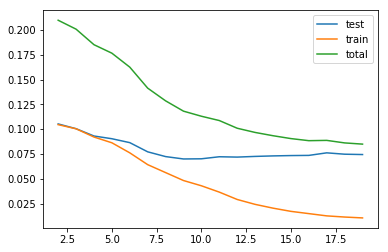

In [24]:
trainerrs = []
testerrs = []

for i in range(2, 20):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    trainE = accuracy_score(y_train, clf.predict(X_train))
    testE = accuracy_score(y_test, clf.predict(X_test))
    trainerrs.append(1-trainE)
    testerrs.append(1-testE)
    
plt.plot(range(2,20), testerrs, label = 'test')
plt.plot(range(2,20), trainerrs, label = 'train')
plt.plot(range(2,20), [x+y for x,y in zip(trainerrs,testerrs)], label = 'total')
plt.legend()

In [ ]:
dff.to_csv('foods.csv', sep = ',')